#                            <h style="font-family:Times New ROman;"><strong> <font color=#2d2d86>Least Square Smoothing</font></strong></h>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from scipy.sparse import spdiags
from numpy.linalg import matrix_rank as rank

In [3]:
read_file=pd.read_csv(r'data.txt',header=None)
read_file.to_csv(r'data.csv',index=None)
Noisy_Signal=pd.read_csv('data.csv')
N=len(Noisy_Signal)

   

<h2 style="font-family:Times New Roman;">Smoothing (D(degree) = 2)</h2>

<p style="font-family:Georgia"> D is the second-order difference matrix. It approximates the second-order derivative. In order to exploit fast banded solvers, we define D as a sparse matrix using 'spdiags'.</p>



In [7]:
x=np.ones(N,dtype=int)

data=np.array([x,-2*x,x])

diags=np.array([0,1,2])

Rank=np.linalg.matrix_rank(data)

D=spdiags(data,diags, N-2,N).toarray()
print(D)

#Observe the first and last corners of D. (D is too big to display, so we show the first and last corners only.)
#First five corner of D:
print(D[:5,:5])
print(diags.shape)


[[ 1 -2  1 ...  0  0  0]
 [ 0  1 -2 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ... -2  1  0]
 [ 0  0  0 ...  1 -2  1]]
[[ 1 -2  1  0  0]
 [ 0  1 -2  1  0]
 [ 0  0  1 -2  1]
 [ 0  0  0  1 -2]
 [ 0  0  0  0  1]]
(3,)


<h2 style="font-family:Times New Roman;">Solve the Least Squares Problem</h2>

In [5]:
def Min_x(lamda):
    banded_matrix = (np.identity(N))+(lamda*(D.T@D))
    Smooth_Signal=np.linalg.inv(banded_matrix)@Noisy_Signal
    return(Smooth_Signal)


<h2 style="font-family:Times New Roman;"> Plot the results</h2>

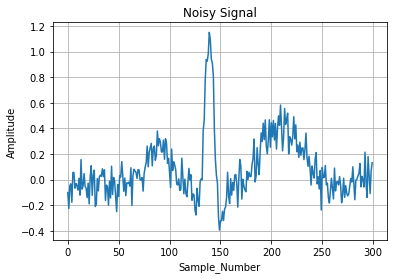

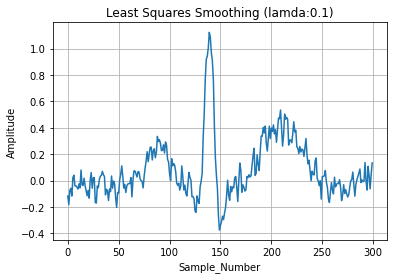

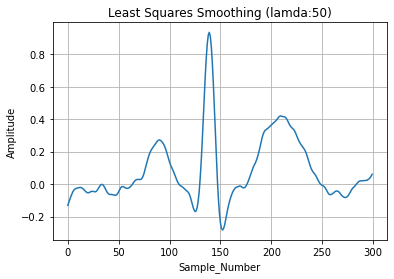

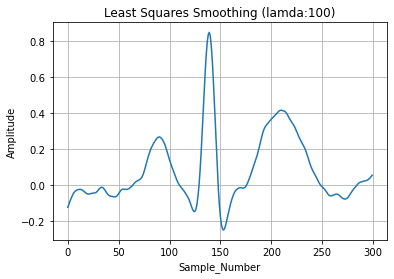

In [7]:
lamda=0.1
Smooth_Signal=Min_x(lamda)


#plt.subplot(2,1,1)
plt.title('Noisy Signal')
plt.plot(Noisy_Signal)
plt.grid(True)
plt.xlabel('Sample_Number')
plt.ylabel('Amplitude')
plt.show()

lamda = 0.1
Smooth_Signal=Min_x(lamda)
plt.title('Least Squares Smoothing (lamda:0.1)')
plt.plot(Smooth_Signal)
plt.grid(True)
plt.xlabel('Sample_Number')
plt.ylabel('Amplitude')
plt.show()

lamda = 50
Smooth_Signal=Min_x(lamda)
plt.title('Least Squares Smoothing (lamda:50)')
plt.plot(Smooth_Signal)
plt.grid(True)
plt.xlabel('Sample_Number')
plt.ylabel('Amplitude')
plt.show()

lamda=100
Smooth_Signal=Min_x(lamda)
plt.title('Least Squares Smoothing (lamda:100)')
plt.plot(Smooth_Signal)
plt.grid(True)
plt.xlabel('Sample_Number')
plt.ylabel('Amplitude')
plt.show()